# CSE 601 Data Mining and Bioinformatics
# Project 2: Clustering Algorithms

# Part 2: K-Means Clustering
Description: This program conducts clustering algorithm on gene expressions datasets (cho.txt and iyer.txt) to find clusters of genes that exhibit similar expression profiles.

Submitted By:

Name: Karan Manchandia | UBIT: karanman | Person No.: 50290755

Name: Divya Srivastava | UBIT: divyasri | Person No.: 50290383

Name: Varsha Lakshman | UBIT: varshala | Person No.: 50288138

In [62]:
#Importing the libraries 
import numpy as np
from math import sqrt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as mapcm

In [63]:
#Inputting the name of the file
while True:
    try:
        data_file = input("Enter the name of the gene expression data file: ")
                
    # In case of a error the except block will be executed
    except:
        print("Error: Could not find file or read data")
        continue
        
    # This block will be executed after correct data file name is entered
    else:
        print("Correct data file found and imported\n")
        break
    

Enter the name of the gene expression data file: cho.txt
Correct data file found and imported



In [64]:
#Reading the file and using rstrip() removing the whitespace, newline characters, tab characters, and carrige return...
# ...characters (\n \t \r respectively) on the tail of each line in the file which is tab seperated.  
with open(data_file, "r") as file:
        data1 = [line.rstrip().split('\t') for line in file]

In [65]:
#Converting the data of the file to a numpy array of type float
data1 = np.asarray(data1).astype(np.float)

In [66]:
#Extraxting the first columns of all the rows as gene and 2nd column as ground truth and the unique ground truth values as the number of classes
data_file1 = data1[:,0]
data_file2 = data1[:,1].astype(int)
classes = len(np.unique(data_file2))

In [67]:
#creating a ground truth matrix
gt_matrix = np.zeros((len(data_file2),len(data_file2)))
for i in range(len(data_file2)):
    for j in range(len(data_file2)):
        val = 1 if (data_file2[i]==data_file2[j]) else 0
        gt_matrix[i][j] = val

In [68]:
#Creating the feature dataset by deleting the 1st and 2nd columns i.e. gene and ground truth columns from the original dataset
impo_data = np.delete(data1,[0,1],axis=1)

In [69]:
#Giving choice to either input the initial cluster centre indices or selecting the first k cluster centers as per the user's choice 
cent = input("Do you want to enter initial centroids (Y or N): ")
if cent == 'N' or cent =='n':
    #Inputting the number of centroids and creating a numpy array of centroids with first k data elements, if choice is 'No'
    k = int(input("Enter the number of centroids i.e. k: "))
    centroid = []
    for i in range(k):
        centroid.append(impo_data[i])
    centroids= np.asarray(centroid)
else:
    #Inputting the initial centre indices from the user if the choice is 'Yes'
    cent_indices = input("Enter initial centers indices: ")
    centroids = impo_data[np.asarray(cent_indices.split(',')).astype(int)-1,:].astype(float)
# Setting 'k' as the number of centroids
k = len(centroids)
print("No. of centroids, k = "+str(len(centroids)))
cent= centroids

Do you want to enter initial centroids (Y or N): Y
Enter initial centers indices: 1,3,5,7,9
No. of centroids, k = 5


In [70]:
#Inputting the number of iterations to determine the final clustering results 
while True:
    try:
        iters = int(input("Enter the total number of iterations:\n"))
        
    # In case of a error(such as entering a string insterd of number) the except block will be executed
    except:
        print("Error: Please enter a number(int)")
        continue
        
    # This block will be executed after iterations in correct format is entered
    else:
        print("\nTotal number of iterations is set to be {}".format(iters))
        break
    

Enter the total number of iterations:
100

Total number of iterations is set to be 100


In [71]:
#Method to update centroids by taking mean of all data points of each cluster

for n in range(iters):
    clustered_cc = []   
    for i in range(len(impo_data)):
        #Classifying the data points to closest centroid as per the euclidian distance
        euc = []
        for j in range(len(centroids)):
            #The below loop calculates the euclidian distance between the data points and cluster centroids
            distance = 0
            for x in range(len(impo_data[i])):
                distance += ((impo_data[i][x] - centroids[j][x]) ** 2)
            dist = sqrt(distance)   
            euc.insert(j,dist)

        clustered_cc.insert(i,np.argmin(euc)+1)
    clustered_cc = np.asarray(clustered_cc)
    #Calculating the average of all the datapoints in a cluster and updating the cluster centroids to that value
    new_cent = []
    for i in range(len(centroids)):
        arr_temp = np.asarray([np.where(clustered_cc[:] == i+1)][0])[0]
        per_cluster = impo_data[arr_temp,:]
        if len(per_cluster) == 0:
            new_cent.insert(i, centroids[i])
        else:
            new_cent.insert(i,np.mean(per_cluster, axis=0))
    centroids_new = np.asarray(new_cent)
    
    if np.array_equal(centroids, centroids_new):
        break
    centroids = centroids_new
print("Clustered class is:")
print(clustered_cc)


Clustered class is:
[1 2 1 5 5 5 5 5 5 5 5 1 1 1 1 1 5 1 5 1 1 1 1 1 2 5 1 2 5 3 1 2 1 1 1 5 1
 5 1 1 1 3 5 5 5 1 1 1 1 1 1 1 1 1 5 5 1 1 5 1 1 5 1 2 1 3 5 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 5 2 2 2 2 2 2 2 2 2 2 2 2 4 2 1 4 1 5 2 2 1 1 2 2 4 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2
 2 1 1 5 1 1 2 2 2 2 2 2 2 1 2 2 2 4 2 4 2 4 4 2 4 3 4 2 4 2 4 4 4 2 4 1 4
 2 2 2 4 4 2 4 2 2 2 2 2 4 4 4 1 4 4 5 4 4 4 2 2 2 4 4 4 4 2 2 4 4 4 4 4 4
 4 4 4 4 2 2 4 5 4 2 4 4 2 2 2 4 4 2 4 4 3 4 4 3 3 4 4 4 4 4 5 3 4 5 5 4 4
 5 4 5 4 4 4 4 4 4 4 4 4 4 4 5 4 3 4 4 4 4 4 3 3 4 4 4 5 4 4 4 4 4 4 4 5 3
 3 3 3 3 3 3 3 3 4 3 3 3 3 5 3 3 3 5 5 3 5 5 5 3 5 5 5 4 5 3 5 5 5 3 3 5 5
 5 3 3 5 3 3 3 3 5 3 3 3 5 3 3 3]


In [72]:
#Method to update centroids by taking mean of all data points of each cluster

for n in range(iters):
    clustered_cc = []   
    for i in range(len(impo_data)):
        #Classifying the data points to closest centroid as per the euclidian distance
        euc = []
        for j in range(len(centroids)):
            #The below loop calculates the euclidian distance between the data points and cluster centroids
            distance = 0
            for x in range(len(impo_data[i])):
                distance += ((impo_data[i][x] - centroids[j][x]) ** 2)
            dist = sqrt(distance)   
            euc.insert(j,dist)

        clustered_cc.insert(i,np.argmin(euc)+1)
    clustered_cc = np.asarray(clustered_cc)
    #Calculating the average of all the datapoints in a cluster and updating the cluster centroids to that value
    new_cent = []
    for i in range(len(centroids)):
        arr_temp = np.asarray([np.where(clustered_cc[:] == i+1)][0])[0]
        per_cluster = impo_data[arr_temp,:]
        if len(per_cluster) == 0:
            new_cent.insert(i, centroids[i])
        else:
            new_cent.insert(i,np.mean(per_cluster, axis=0))
    centroids_new = np.asarray(new_cent)
    
    #if the updated centroid values are not changing anymore, we stop the further iterations
    if np.array_equal(centroids, centroids_new):
        break
    centroids = centroids_new
print("Clustered class is:")
print(clustered_cc)


Clustered class is:
[1 2 1 5 5 5 5 5 5 5 5 1 1 1 1 1 5 1 5 1 1 1 1 1 2 5 1 2 5 3 1 2 1 1 1 5 1
 5 1 1 1 3 5 5 5 1 1 1 1 1 1 1 1 1 5 5 1 1 5 1 1 5 1 2 1 3 5 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 5 2 2 2 2 2 2 2 2 2 2 2 2 4 2 1 4 1 5 2 2 1 1 2 2 4 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2
 2 1 1 5 1 1 2 2 2 2 2 2 2 1 2 2 2 4 2 4 2 4 4 2 4 3 4 2 4 2 4 4 4 2 4 1 4
 2 2 2 4 4 2 4 2 2 2 2 2 4 4 4 1 4 4 5 4 4 4 2 2 2 4 4 4 4 2 2 4 4 4 4 4 4
 4 4 4 4 2 2 4 5 4 2 4 4 2 2 2 4 4 2 4 4 3 4 4 3 3 4 4 4 4 4 5 3 4 5 5 4 4
 5 4 5 4 4 4 4 4 4 4 4 4 4 4 5 4 3 4 4 4 4 4 3 3 4 4 4 5 4 4 4 4 4 4 4 5 3
 3 3 3 3 3 3 3 3 4 3 3 3 3 5 3 3 3 5 5 3 5 5 5 3 5 5 5 4 5 3 5 5 5 3 3 5 5
 5 3 3 5 3 3 3 3 5 3 3 3 5 3 3 3]


In [73]:
unq_clstr = []
for item5 in clustered_cc:
    if item5 not in unq_clstr:
        unq_clstr.append(item5)
unq_clstr.sort()
print("Unique clusters formed are:")
print(unq_clstr)

Unique clusters formed are:
[1, 2, 3, 4, 5]


In [74]:
#Visualizing the results using PCA package imported from sklearn.decomposition with final centroids and the data classified to different cluster centres
pca = PCA(n_components=2, svd_solver='full')
pca.fit(impo_data)
new_factors = pca.transform(impo_data)
pca_cent = new_factors[0:k,:]

In [75]:
#Creating the cluster matrix for external index creation

classes = clustered_cc.astype(int)
inc_matrix = np.zeros((len(classes),len(classes)))

for i in range(len(classes)):
    for j in range(len(classes)):
        val = 1 if (classes[i]==classes[j]) else 0
        inc_matrix[i][j] = val
cluster_matrix = inc_matrix

In [76]:
# Deriving the dimension parameters from cluster matrix and ground truth matrix for external index calculation
f11 = f00 = f10 = f01 = 0.0
for i in range(len(gt_matrix)):
    for j in range(len(gt_matrix)):
        if gt_matrix[i][j] == cluster_matrix[i][j]:
            if gt_matrix[i][j] == 1:
                f11 += 1
            else:
                f00 += 1
        else:
            if gt_matrix[i][j] == 1:
                f10 += 1
            else:
                f01 += 1


#Calculating the Jaccard and Rand coefficients using the calculated dimension values for validation of results
Jaccard= str(f11/(f11 + f10 + f01))  
Rand= str((f11 + f00)/(f11 + f00 + f10 + f01))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

The file name is: cho.txt
The number of centroids i.e. cluster centers are: 5
No. of iterations are: 100
Initial centroids are: 
[[-0.69  -0.96  -1.16  -0.66  -0.55   0.12  -1.07  -1.22   0.82   1.4
   0.71   0.68   0.11  -0.04   0.19   0.82 ]
 [-0.3   -0.56  -0.29  -0.5   -0.27  -0.29  -0.56  -1.04   0.32   0.9
   0.45   0.17   0.164 -0.12  -0.16   0.67 ]
 [-1.04   0.13   0.51  -0.44  -0.88  -0.32   0.21   0.95   1.07   0.38
   0.01  -0.13  -0.78  -0.13   0.092  0.   ]
 [-0.16   0.35  -0.13  -0.26  -0.4   -0.47   0.1    0.74   0.45   0.04
  -0.3   -0.3   -0.118 -0.59   0.14   0.2  ]
 [-0.18   0.14  -0.04  -0.76  -0.68  -0.53  -0.37   0.19   0.81   0.56
   0.03  -0.26  -0.13  -0.41   0.09   0.45 ]]
New centroids at the end of 100 iterations are: 
[[ 2.71509434e-02 -3.91698113e-01 -7.35283019e-01 -6.77169811e-01
  -5.70566038e-01 -3.71886792e-01 -5.12641509e-01 -4.56981132e-01
   1.27924528e-01  9.10000000e-01  6.05471698e-01  3.33245283e-01
   1.13056604e-01  9.72830189e-02  1.48471698

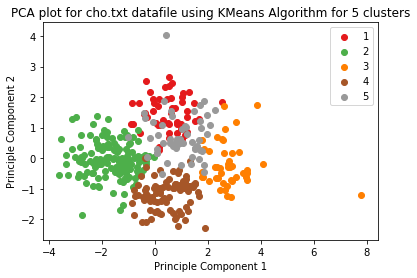

In [77]:
# Generating variable number of colors
var_col = mapcm.Set1(np.linspace (0,1,len(unq_clstr)))

# # Plotting the final dataframe
plot1 = plt.figure()
plot11 = plot1.add_subplot(111)

# Taking first and second columns from new_factors()
first_col = new_factors[:,0]
second_col = new_factors[:,1]

# Calculating the coordinates for the plot
for x, y in enumerate(unq_clstr):
    temp_a = []
    temp_b = []
    
    # Populating temp_a list
    for (m,n) in enumerate(first_col):
        if clustered_cc[m] == y:
            temp_a.append(n)
            
    # Populating temp_b list
    for (m,n) in enumerate(second_col):
        if clustered_cc[m] == y:
            temp_b.append(n)
    
    # Converting labels to string
    l = str(int(y))
    
    # Plotting the graph
    plot11.scatter(temp_a,temp_b, c=var_col[x], label=l)
    
#giving the location of the legend as "best"
#This would place the legend at the location in the graph that would overcover minimum data points
plot11.legend(loc='best')

# Giving X axis label
plot11.set_xlabel('Principle Component 1')

# Giving the title for the graph
plot11.set_title(f"PCA plot for {data_file} datafile using KMeans Algorithm for {k} clusters")

# Giving Y axis label
plot11.set_ylabel('Principle Component 2')

# Saving the scatter plot as a PDF file
# maplot.savefig(f"PCA plot for {data_file} datafile using KMeans Algorithm for {k} clusters")

#Displaying the results
print(f"The file name is: {data_file}")
print(f"The number of centroids i.e. cluster centers are: {k}")
print(f"No. of iterations are: {iters}")
print(f"Initial centroids are: ")
print(cent)
print(f"New centroids at the end of {iters} iterations are: ")
print(centroids)
print(f"The RAND coefficient is: {Rand}")
print(f"The JACCARD coefficient is: {Jaccard}")